Titanic: Machine Learning from Disaster

- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing


1. Defining the problem statement
- Complete the analysis of what sorts of people were likely to survive on the titanic.

2. Collecting the data
- Data came from kaggle here. 
https://www.kaggle.com/competitions/titanic/data

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier



train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')


3. Exploratory data analysis

In [146]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [148]:
train.shape

(891, 12)

In [149]:
test.shape

(418, 11)

In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [152]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [154]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

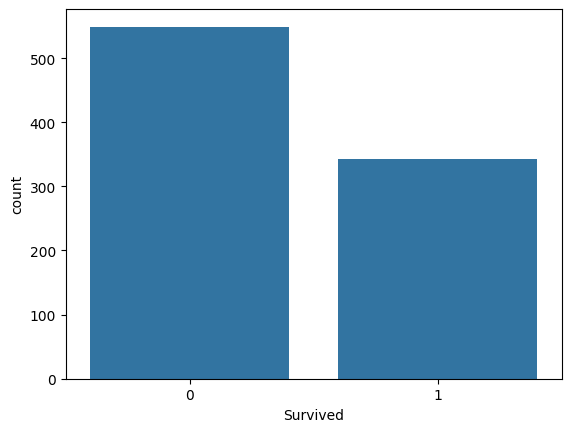

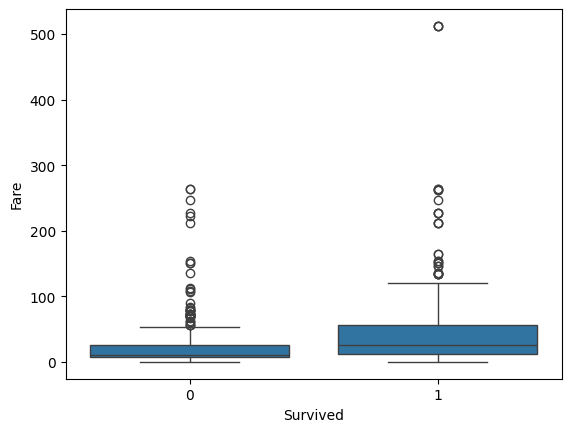

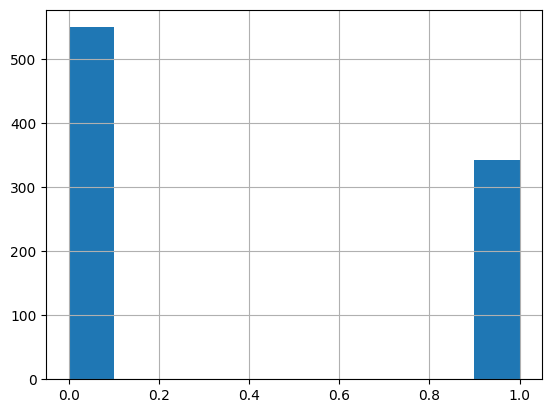

In [156]:

train = pd.read_csv('titanic/train.csv')

sns.countplot(x='Survived', data=train)
plt.show()

sns.boxplot(x='Survived', y='Fare', data=train)
plt.show()

train['Survived'].hist()
plt.show()

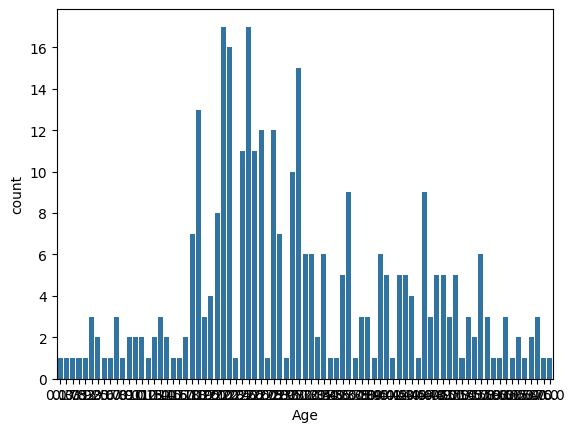

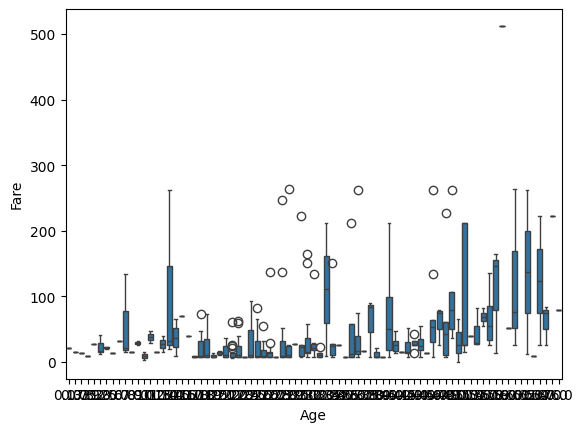

In [157]:
train = pd.read_csv('titanic/test.csv')

sns.countplot(x='Age', data=test)
plt.show()

sns.boxplot(x='Age', y='Fare', data=test)
plt.show()

In [158]:
# Load dataset
train = pd.read_csv('titanic/train.csv')

# Handle missing values
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Drop the cabin column
train = train.drop(columns='Cabin')

# Convert categorical variables to numeric
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

# Feature Scaling
scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])

# Feature Engineering
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Final DataFrame for modeling
print(train.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                             Heikkinen, Miss. Laina    0 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                           Allen, Mr. William Henry    1  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  FamilySize  \
0      0         A/5 21171 -0.502445       False        True           2   
1      0          PC 17599  0.786845       False       False           2   
2      0  STON/O2. 3101282 -0.488854       False        True           1   
3      0  

<Figure size 500x400 with 0 Axes>

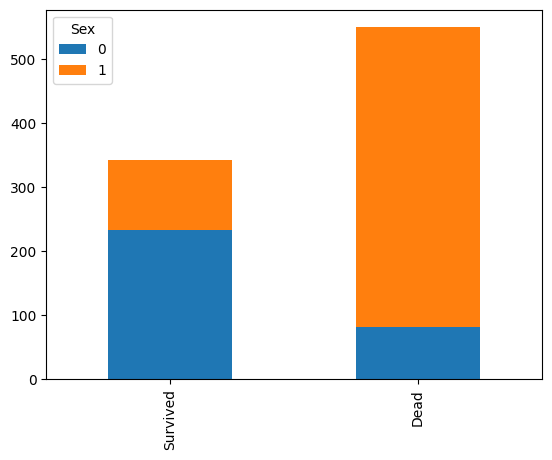

In [159]:
def charts(feature, figsize=(8, 6)):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    
    plt.figure(figsize=figsize)
    df.plot(kind='bar', stacked=True)
    plt.show()

charts('Sex', figsize=(5, 4))

Woman survived more as woman boarded the boats first.

<Figure size 800x600 with 0 Axes>

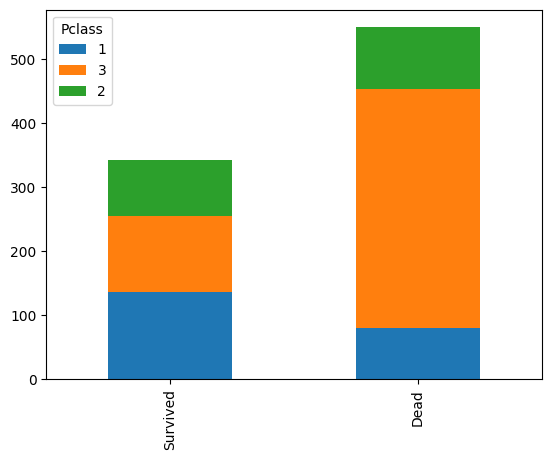

In [160]:
charts('Pclass')

1st class survived more than other classes

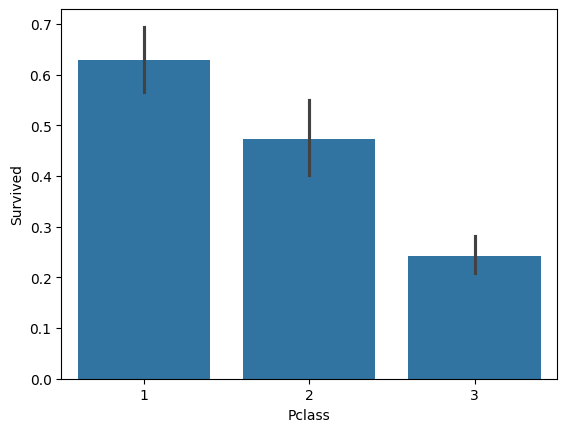

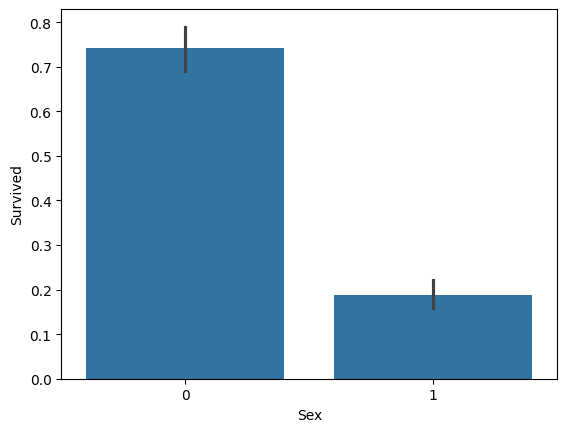

In [161]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

sns.barplot(x='Sex', y='Survived', data=train)
plt.show()


4.  Feature engineering

In [162]:
# Define Feature Matrix (X) and Target Variable (y)

# Define the feature set (X) and target variable (y)
X = train[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone']]
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and validation sets
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")



X_train shape: (712, 6), X_val shape: (179, 6)
y_train shape: (712,), y_val shape: (179,)


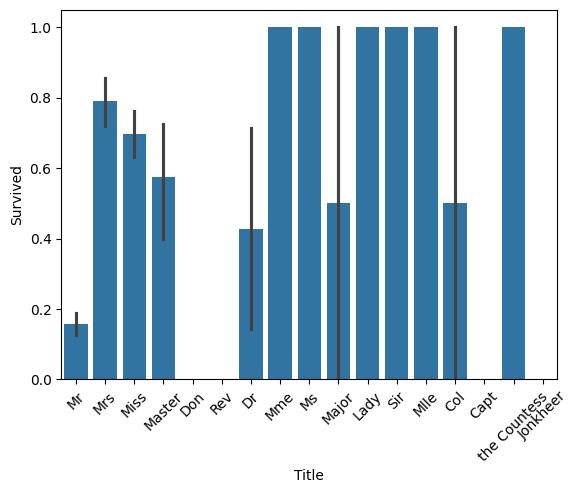

In [163]:
# does this location make sense?

train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
sns.barplot(x='Title', y='Survived', data=train)
plt.xticks(rotation=45)
plt.show()


In [164]:
# Logistic Regression Model

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.8045


Confusion Matrix

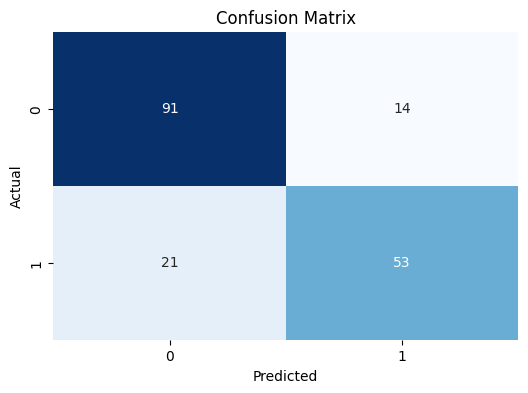

In [165]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives: model correctly predicted that 91 passengers did not survive.
False Positives: model incorrectly predicted that 14 passengers survived, but they did not.
False Negatives: model incorrectly predicted that 21 passengers did not survive, but they actually did.
True Positives: model correctly predicted that 53 passengers survived.

In [166]:
# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision
precision = precision_score(y_val, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate Recall
recall = recall_score(y_val, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 Score
f1 = f1_score(y_val, y_pred)
print(f"F1 Score: {f1:.4f}")



Confusion Matrix:
[[91 14]
 [21 53]]
Accuracy: 0.8045
Precision: 0.7910
Recall: 0.7162
F1 Score: 0.7518


Random Forest

In [167]:
# conpute random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")


Random Forest Accuracy: 0.8156


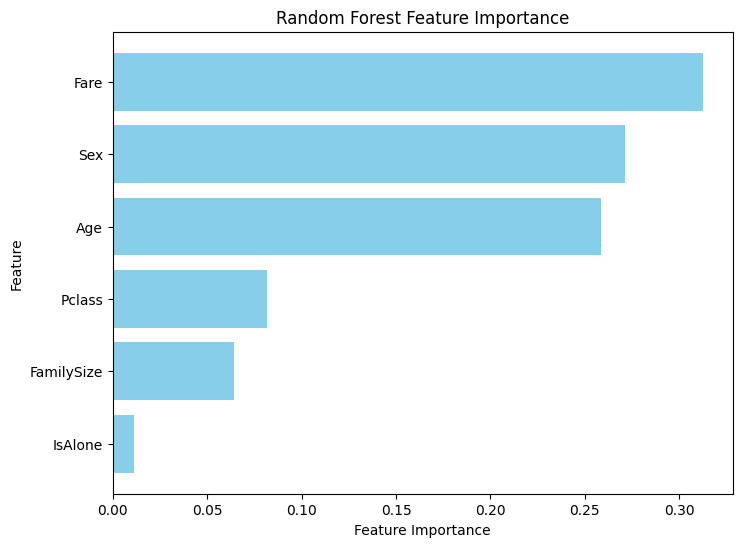

In [168]:


# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort by importance for a cleaner plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


Demostrating that fare is the most important feature for survival

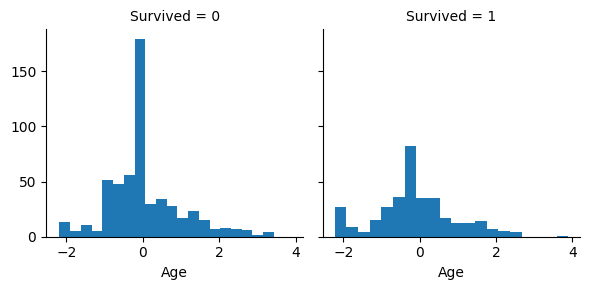

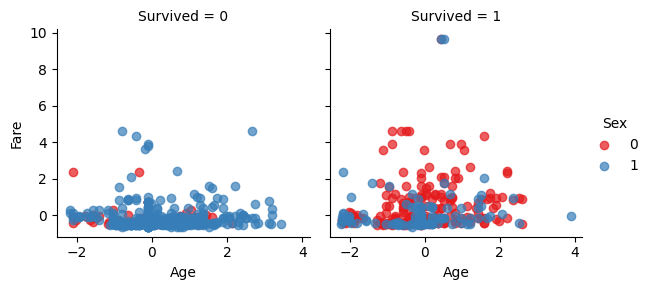

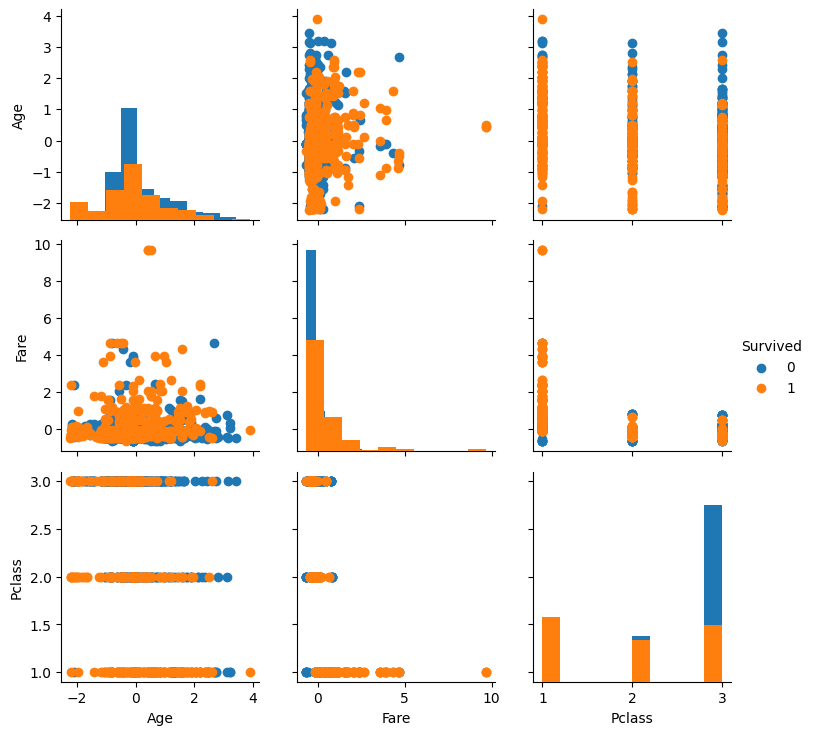

In [169]:
# Create a FacetGrid
g = sns.FacetGrid(train, col="Survived")
g.map(plt.hist, "Age", bins=20)
plt.show()

# Create a FacetGrid
g = sns.FacetGrid(train, col="Survived", hue="Sex", palette="Set1", col_wrap=2)
g.map(plt.scatter, "Age", "Fare", alpha=.7)
g.add_legend()
plt.show()

# # Create a FacetGrid with specified order for 'Sex'
# g = sns.FacetGrid(train, row="Pclass", col="Survived", margin_titles=True)
# g.map_dataframe(sns.boxplot, x="Sex", y="Age", order=['male', 'female'])
# plt.show()

# Create a PairGrid
g = sns.PairGrid(train, hue="Survived", vars=["Age", "Fare", "Pclass"])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()


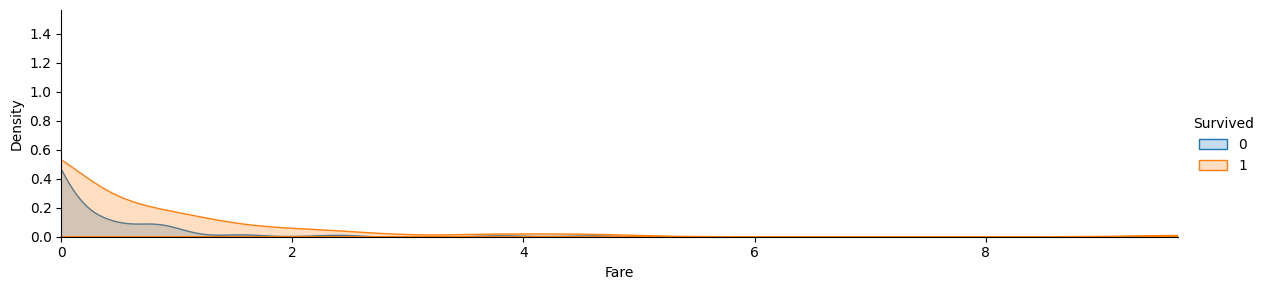

In [170]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

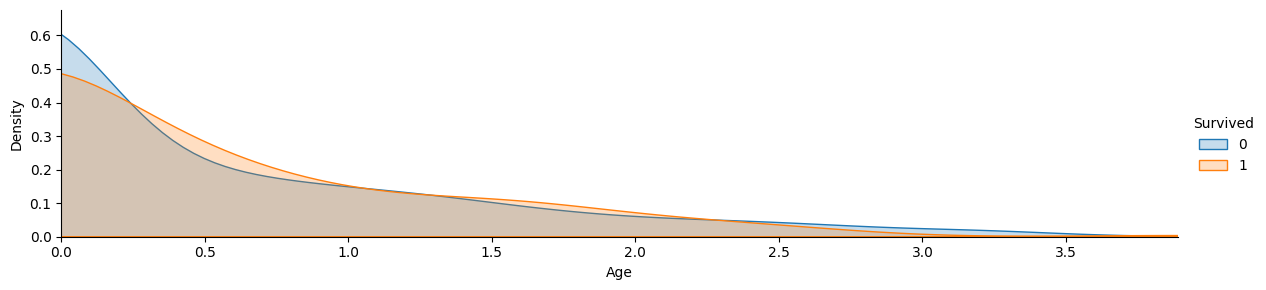

In [171]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

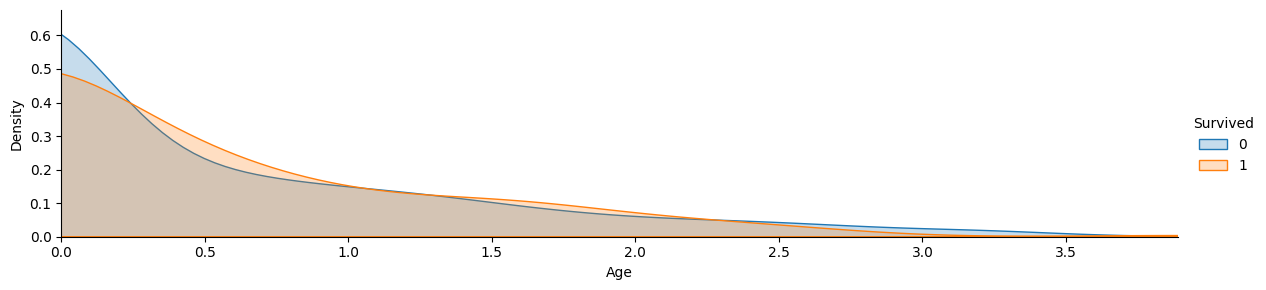

In [172]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

In [173]:
# Prepare the test dataset
test['Age'] = test['Age'].fillna(train['Age'].median())
test['Fare'] = test['Fare'].fillna(train['Fare'].median())
test = test.drop(columns='Cabin')
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

# Feature Scaling
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

# Feature Engineering
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

# Define the feature set for the test dataset
X_test = test[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone']]

# Make predictions on the test dataset
test_predictions = rf_model.predict(X_test)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('titanic_submission.csv', index=False)

print("Testing and submission file creation completed.")

Testing and submission file creation completed.
